In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.4 MB/s eta 0:00:00


Bu hücrede gerekli olan kütüphaneyi indiriyoruz.

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


Bu hücrede kendi google drive hesabımı tanımlıyorum ve yolumu seçiyorum.

In [3]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Burada yolo versiyonunu seçiyorum.

In [4]:
yamldosyasi = "/content/drive/MyDrive/proje/YODAML/data.yaml"

YOLO'nun konfügirasyon dosyasinin yolunu tanimliyoruz.

In [5]:
sonuclar = model.train(
    data = yamldosyasi,
    epochs = 50,
    batch = 16,
    imgsz = 640,
    project = "/content/drive/MyDrive/proje/YODAML/runs",
    name = "train"
)

Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/proje/YODAML/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

Burada model eğitimini gerçekleştiriyoruz, data konfigürasyon dosyası, epochs tekrar sayısı, batch her tekrarda işlenen görsel sayısı, imgsz görsellerin boyutu (x*x)

/content/drive/MyDrive/proje/YODAML/runs/train2


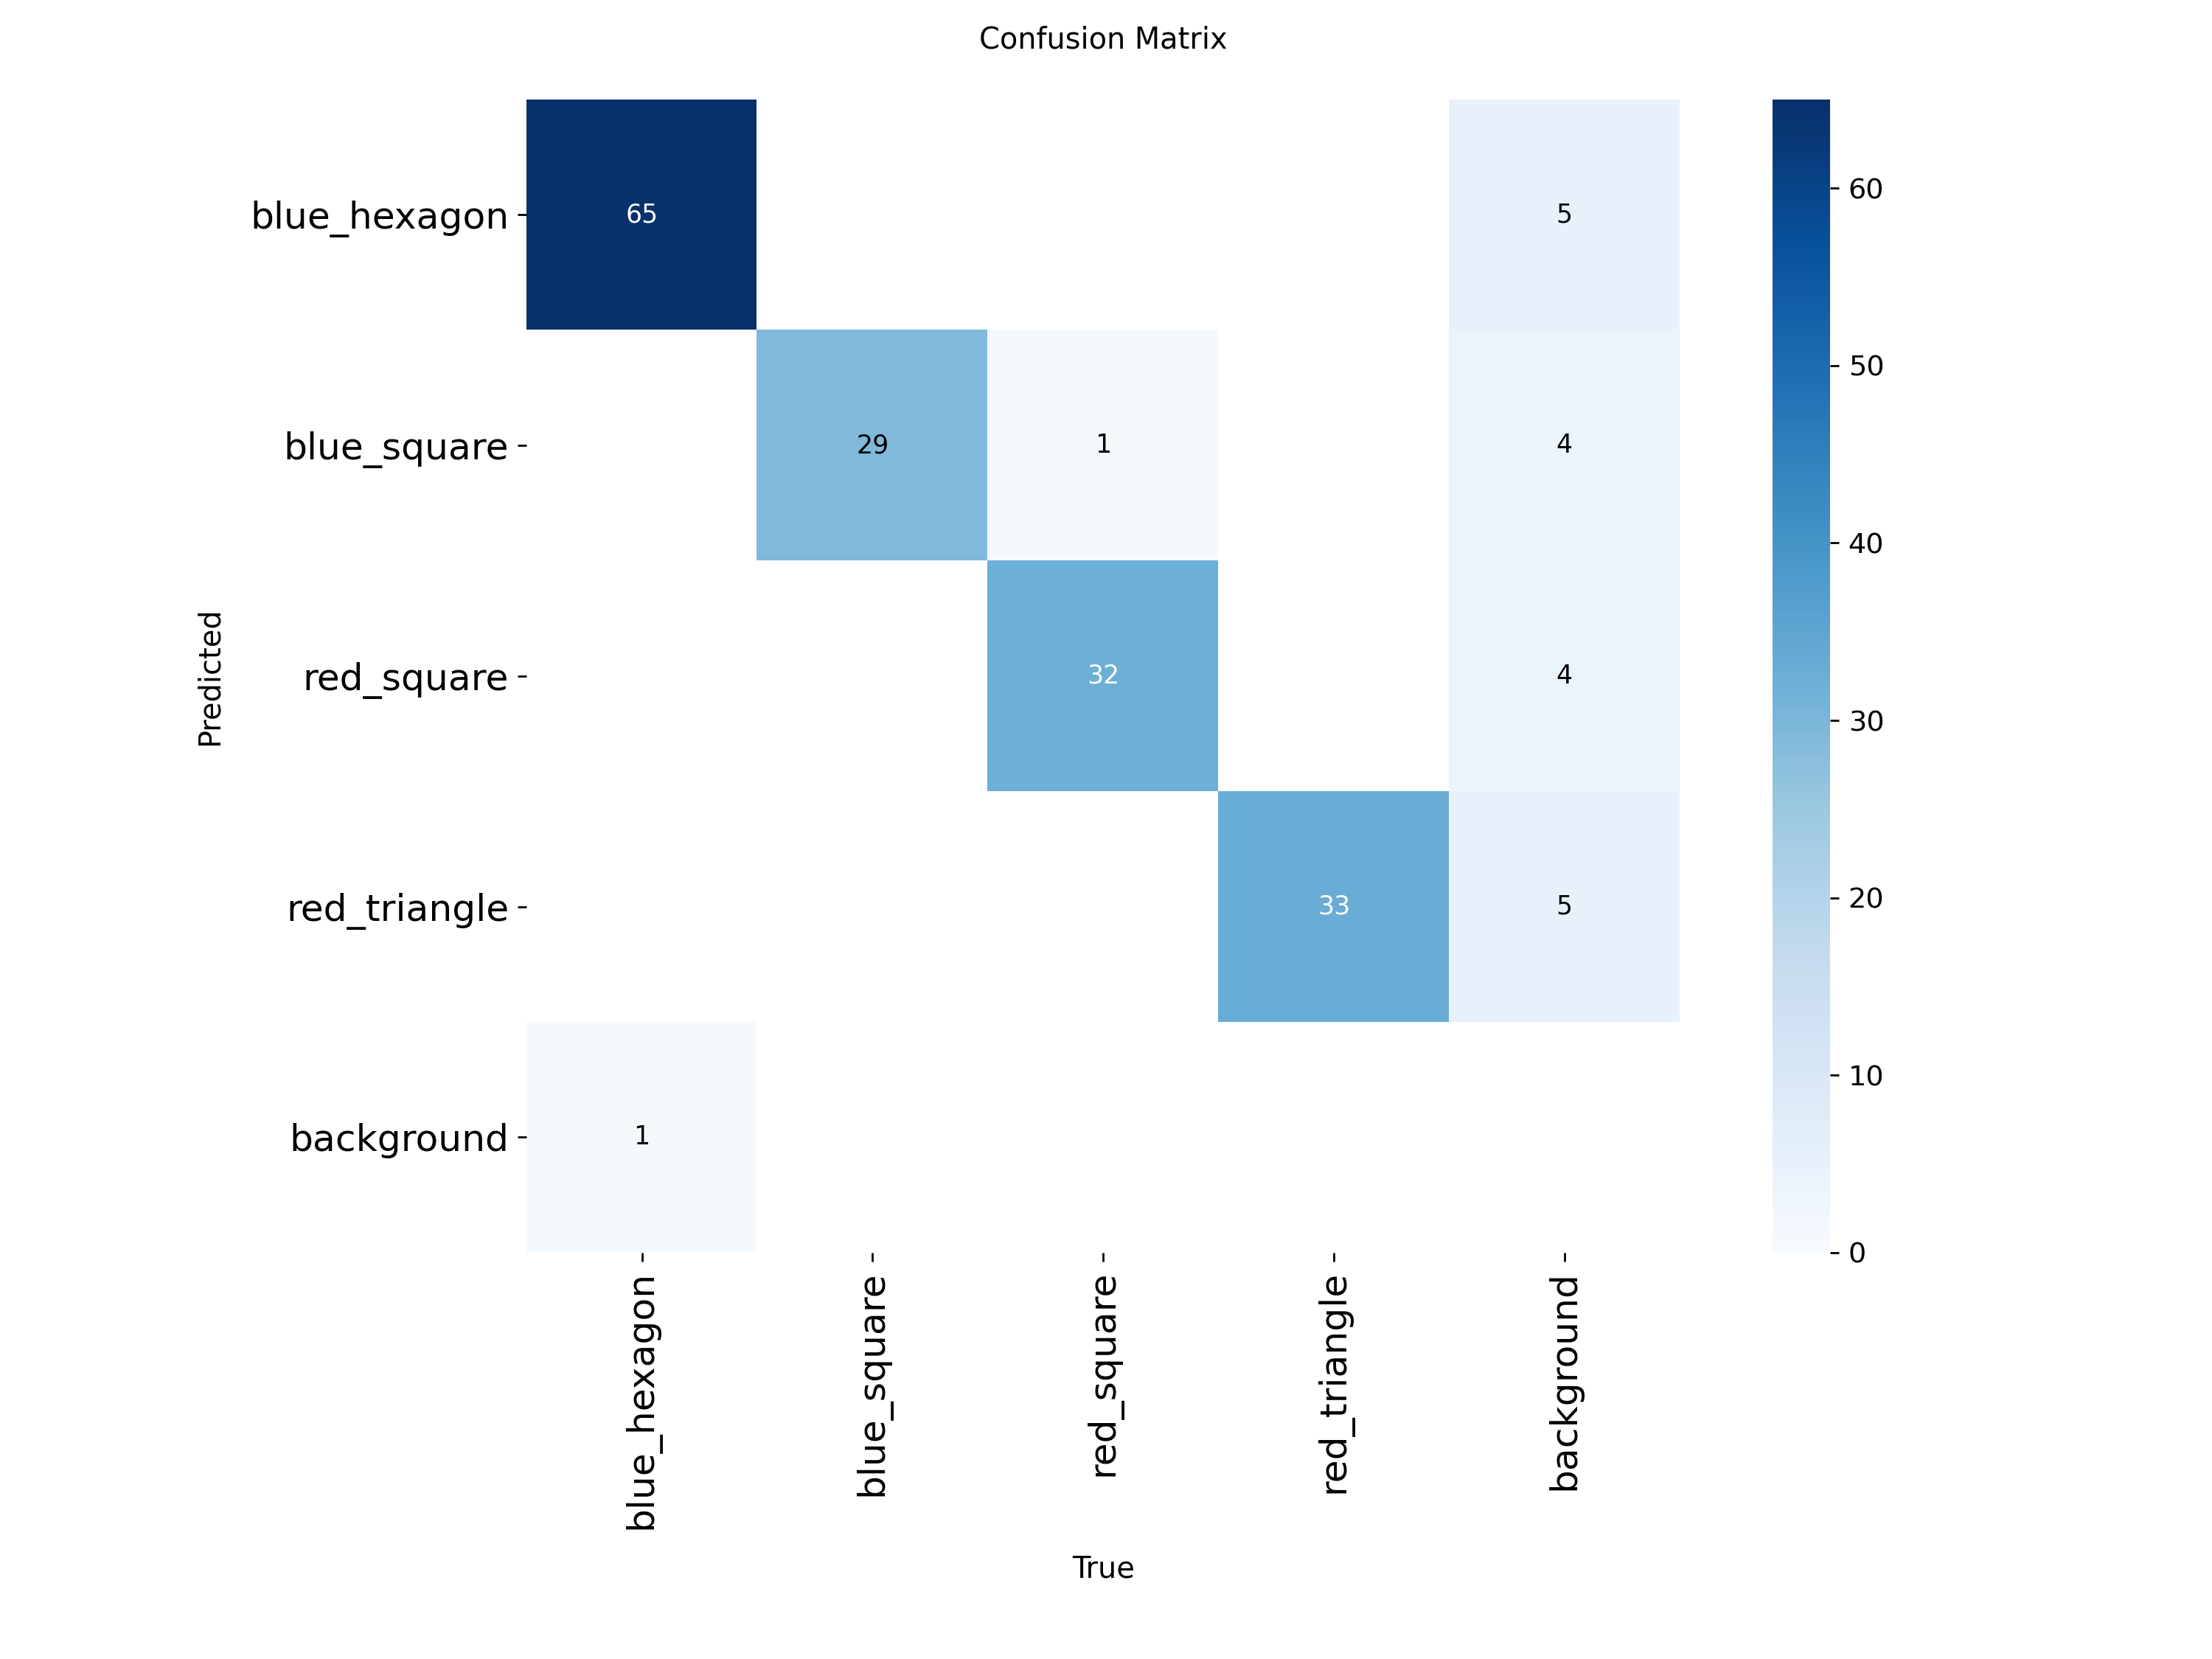

In [8]:
from IPython.display import Image
%cd  /content/drive/MyDrive/proje/YODAML/runs/train2/
Image(filename='confusion_matrix.png',width=600)

Confusion Matrix, sınıflandırma işleminde modelin doğruluğunu ölçen bir metriktir. Gerçek sınıfların tahmin edilenlerle karşılaştırılması sonucu oluşur. 2x2 boyutunda bir matristir ve bu 4 bölme bize 4 sonuç verir;

1.   True Positive: gerçekle tahminin doğru olması
2.   True Negative: gerçekle tahminin yanlış olması
3.   False Positive: gerçeğin yanlış, tahminin doğru olması
4.   False Negative: gerçeğin doğru, tahminin yanlış olması

İlk iki durum (Gerçekle tahmin edilenin tutarlı olması) bize doğru sonuçları verecektir.

Dolayısıyla; model eğitilirken 65 tane mavi altıgeni doğru tahmin etmiştir ki bu çok iyi bir oran.

29 mavi kare, 32 kırmızı kare, 33 kırmızı üçgeni de doğru tahmin etmiş; ancak backgroun olarak etiketlenen bazı görselleri 18 kez yanlış tahmin etmiş (şekiller olarak tahmin etmiş). Dolayısıyla modelin background sınıflandırmasında bir hata var diyebiliriz.




/content/drive/MyDrive/proje/YODAML/runs/train2


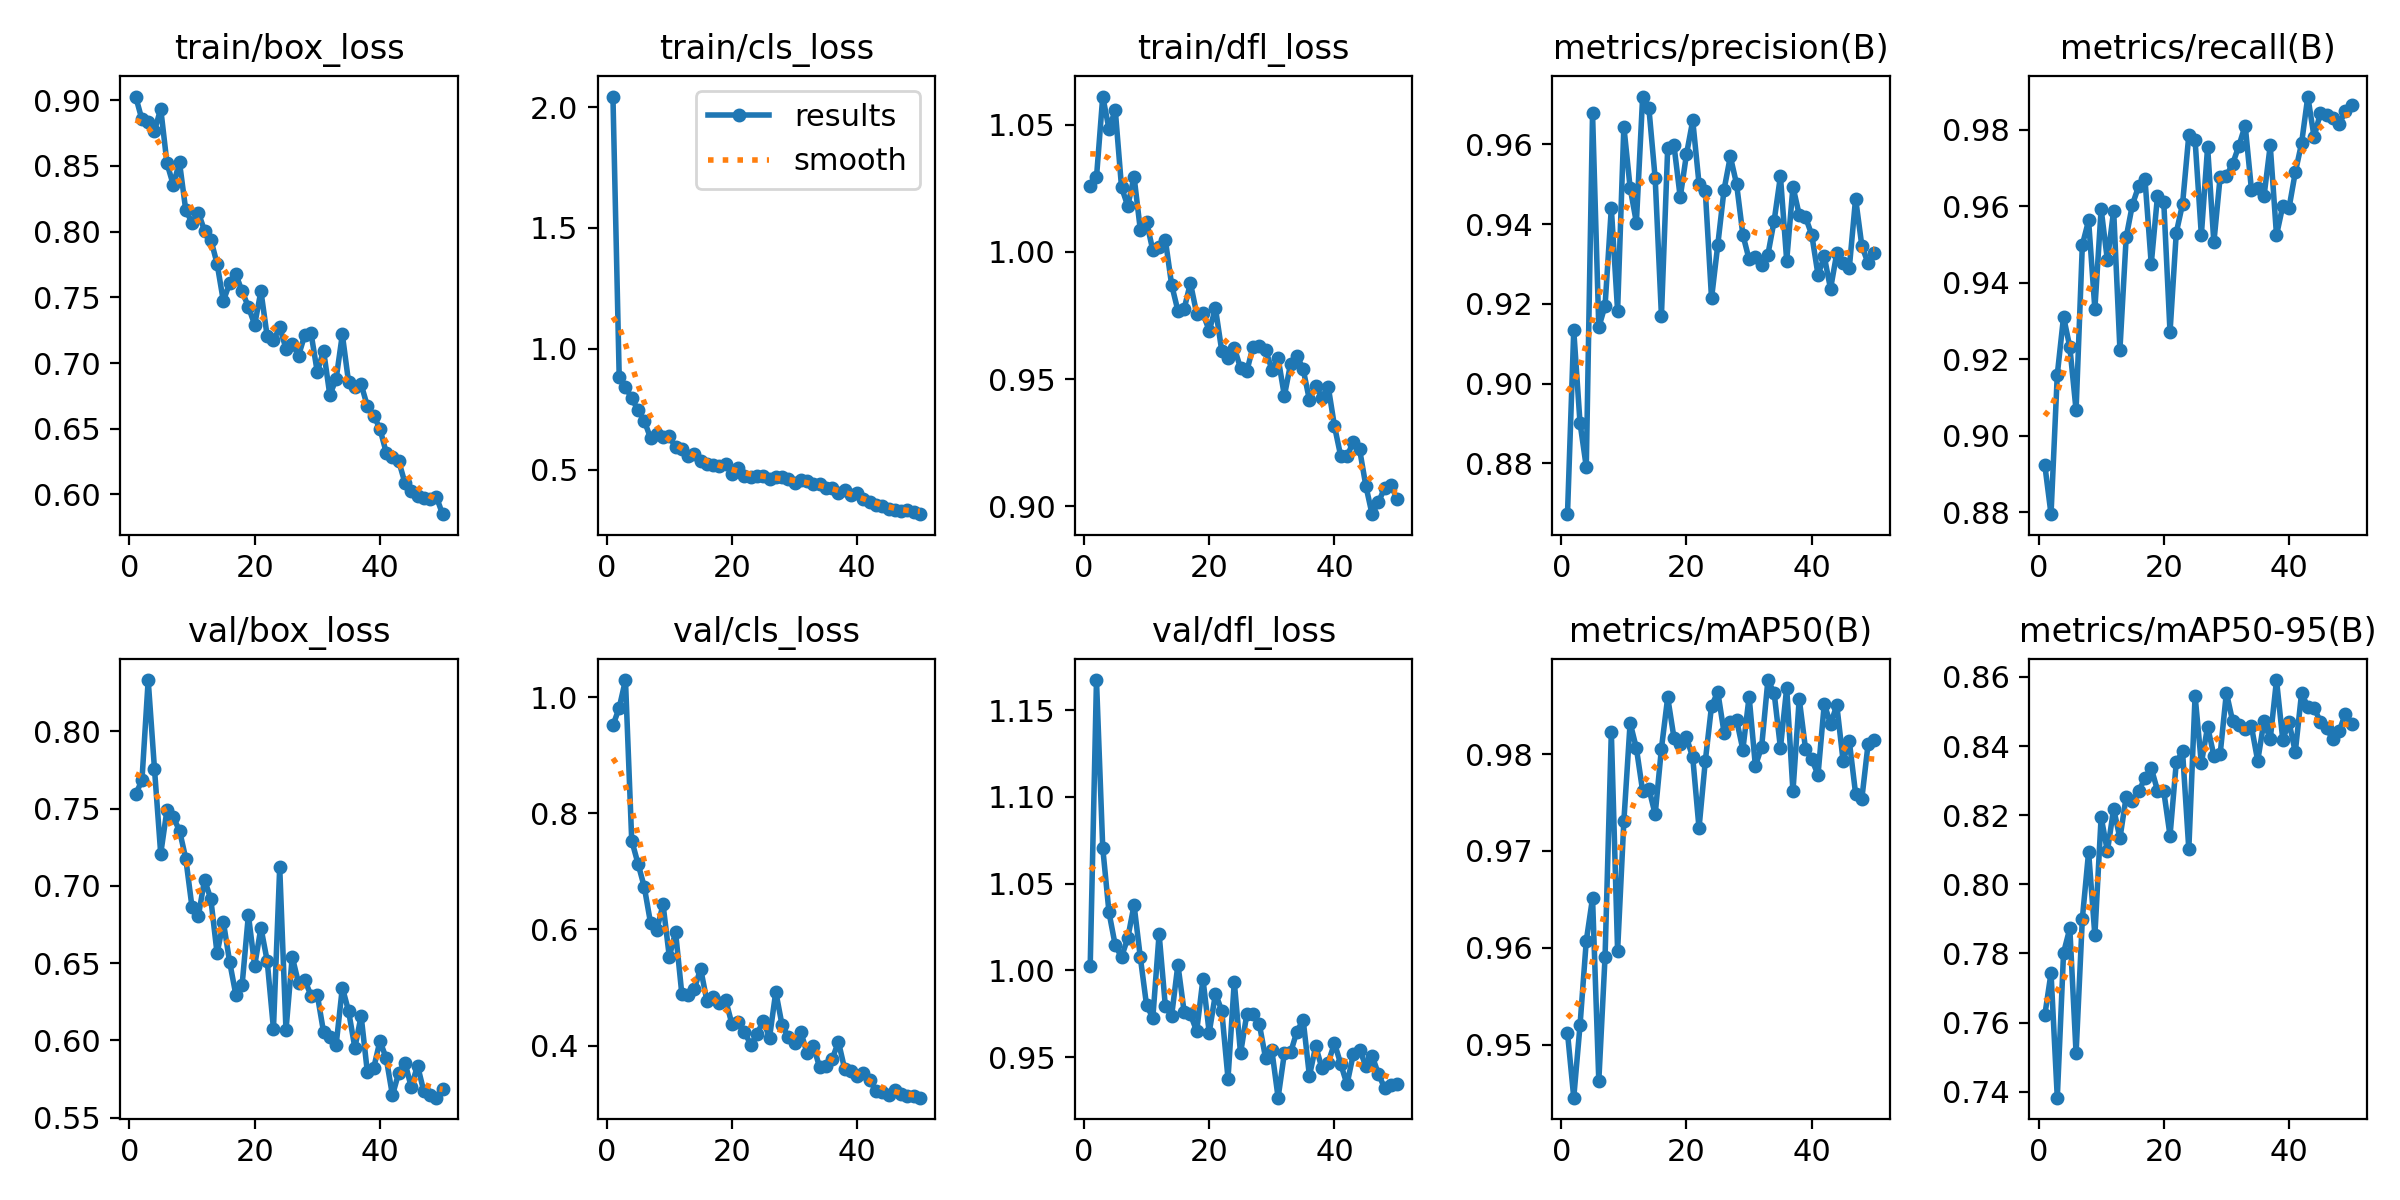

In [9]:
from IPython.display import Image
%cd  /content/drive/MyDrive/proje/YODAML/runs/train2/
Image(filename='results.png',width=600)

Burada ise kayıp fonksiyonlarının grafiklerini görmekteyiz, grafik ilerledikçe kayıp oranının azalması model eğitildiği sürece gittikçe daha da iyi performans veriyor anlamına gelir.

Aynı şekilde sağda kalan diğer metriklerse (precision,recall ve map) en sağlıklı görüntüsü yavaş yavaş artmasıdır. Bizim eğitimimizde karmaşık bir artış söz konusu olduğundan performans aslında o kadar da stabil değil ancak yeterli düzeyde.

/content/drive/MyDrive/proje/YODAML/runs/train2


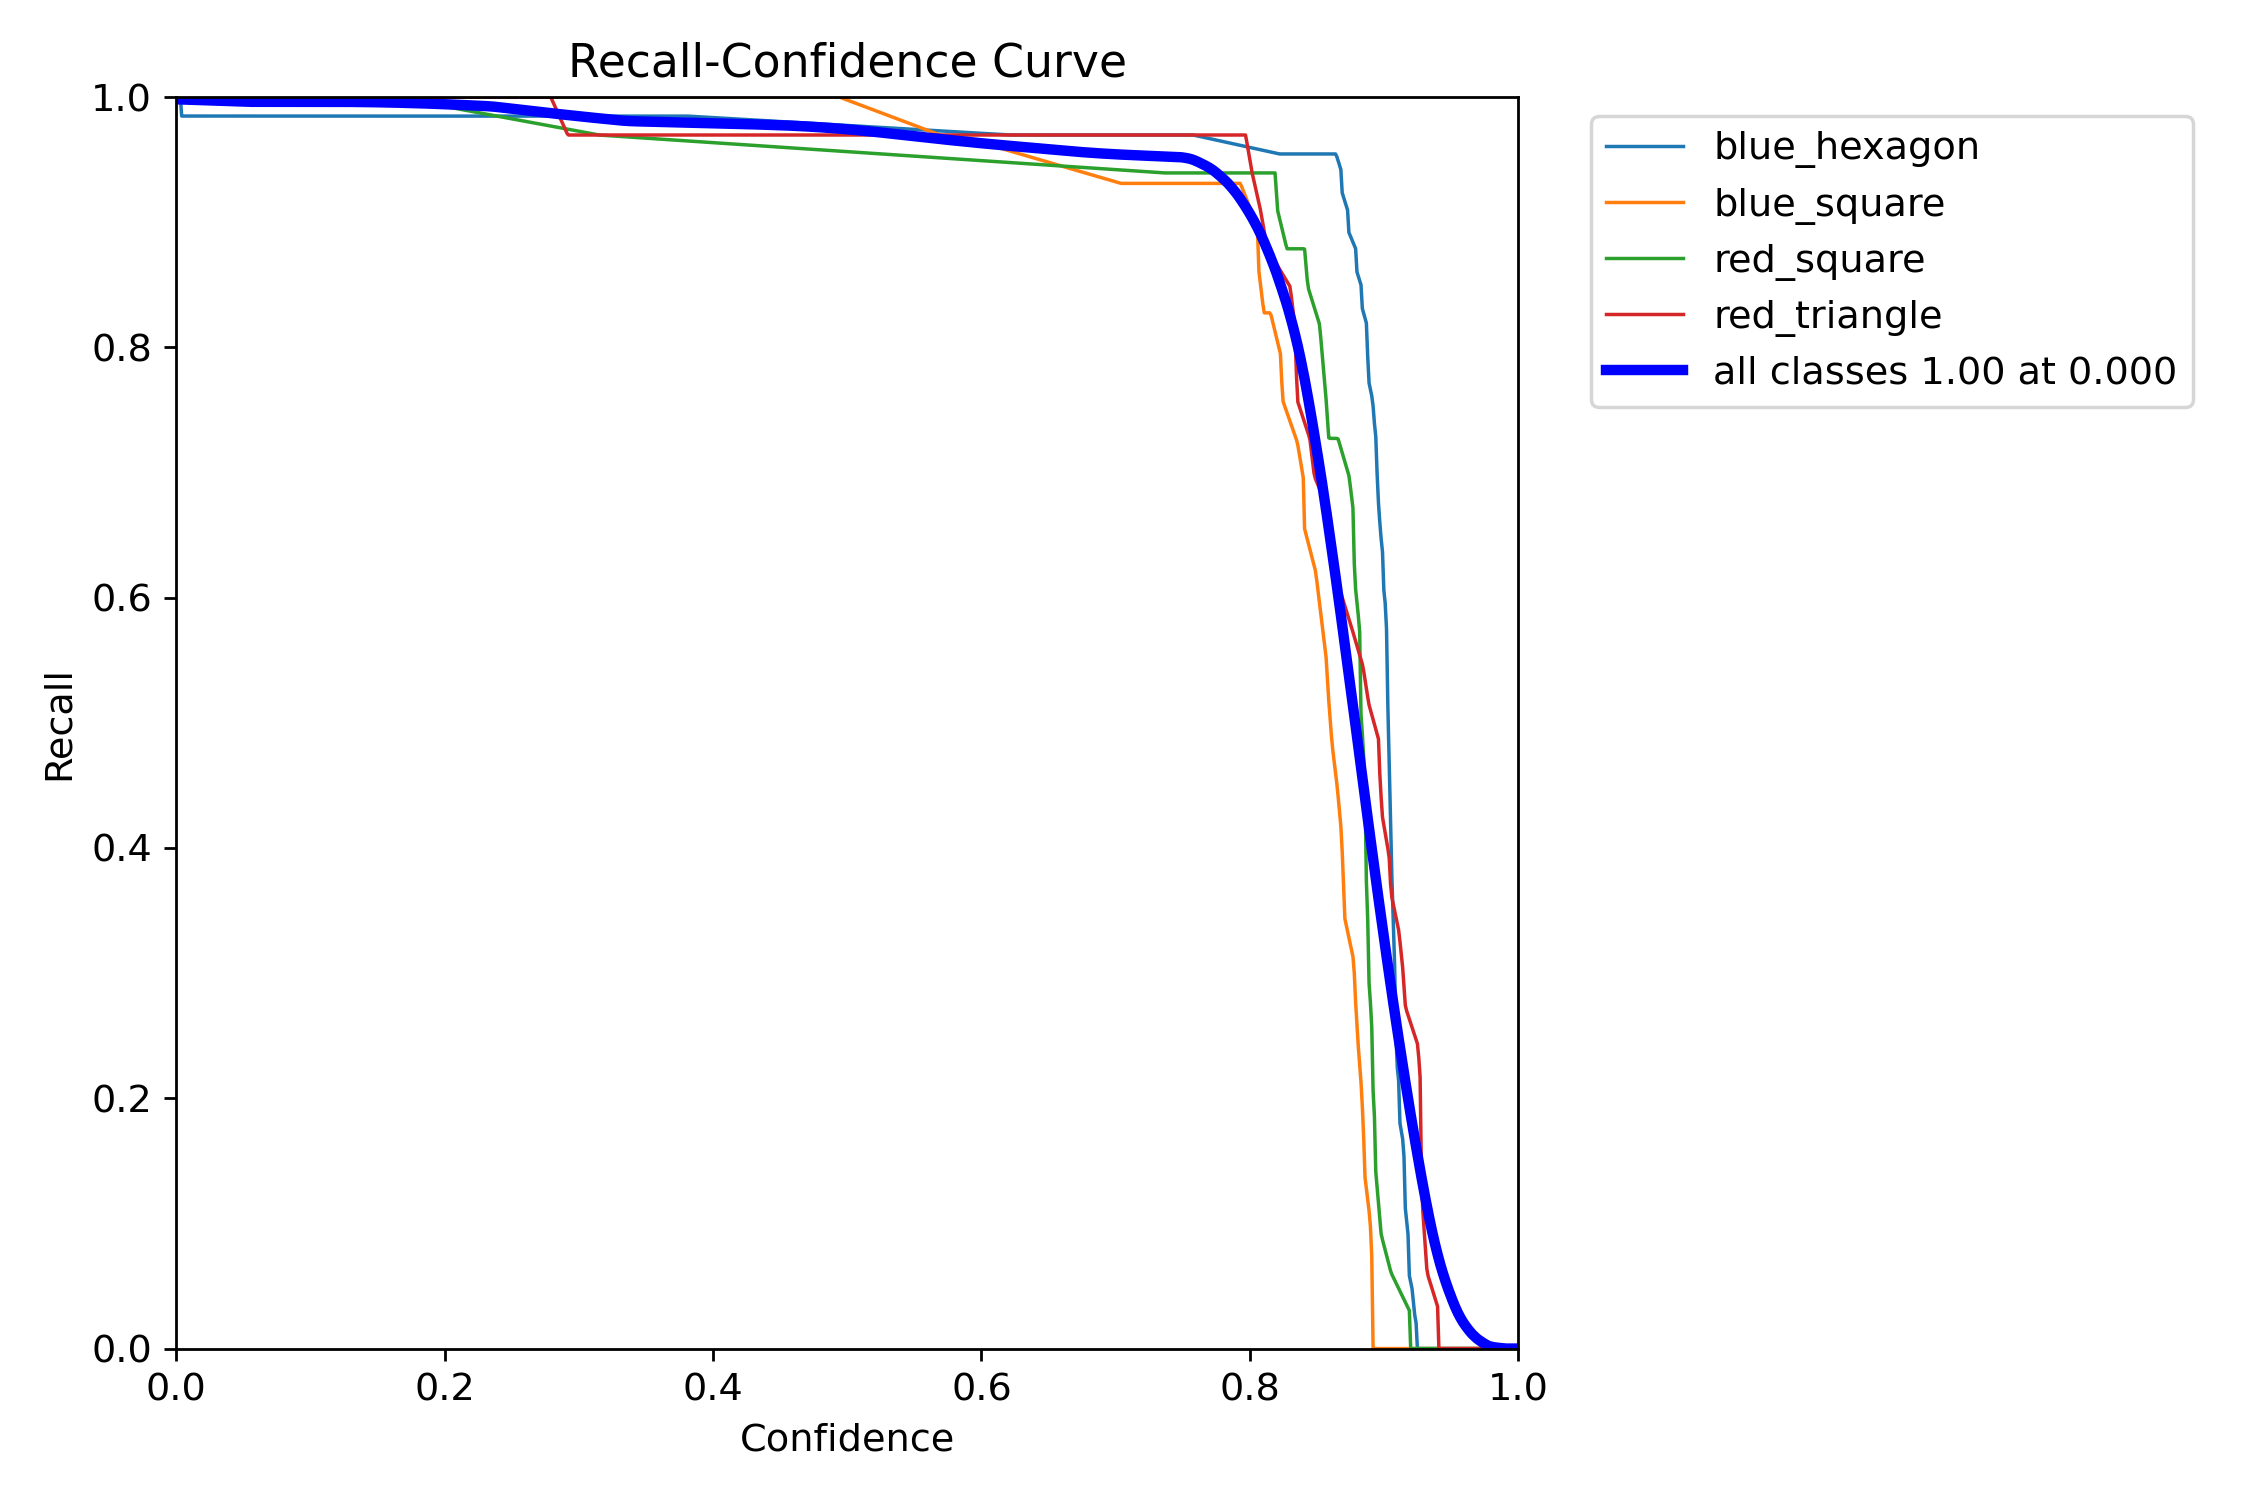

In [14]:
from IPython.display import Image
%cd  /content/drive/MyDrive/proje/YODAML/runs/train2/
Image(filename='BoxR_curve.png',width=600)

Recall: Az önce bahsettiğimiz true positive (Gerçekle tahmin edilenin doğru olması durumu) ne kadarını tespit ettiğinizle alakalıdır. Örneğin bir gorselde 5 mavi altıgen olsaydı ve model 5 tanesini de tahmin etseydi recall oranımız %100 olacaktı.



/content/drive/MyDrive/proje/YODAML/runs/train2


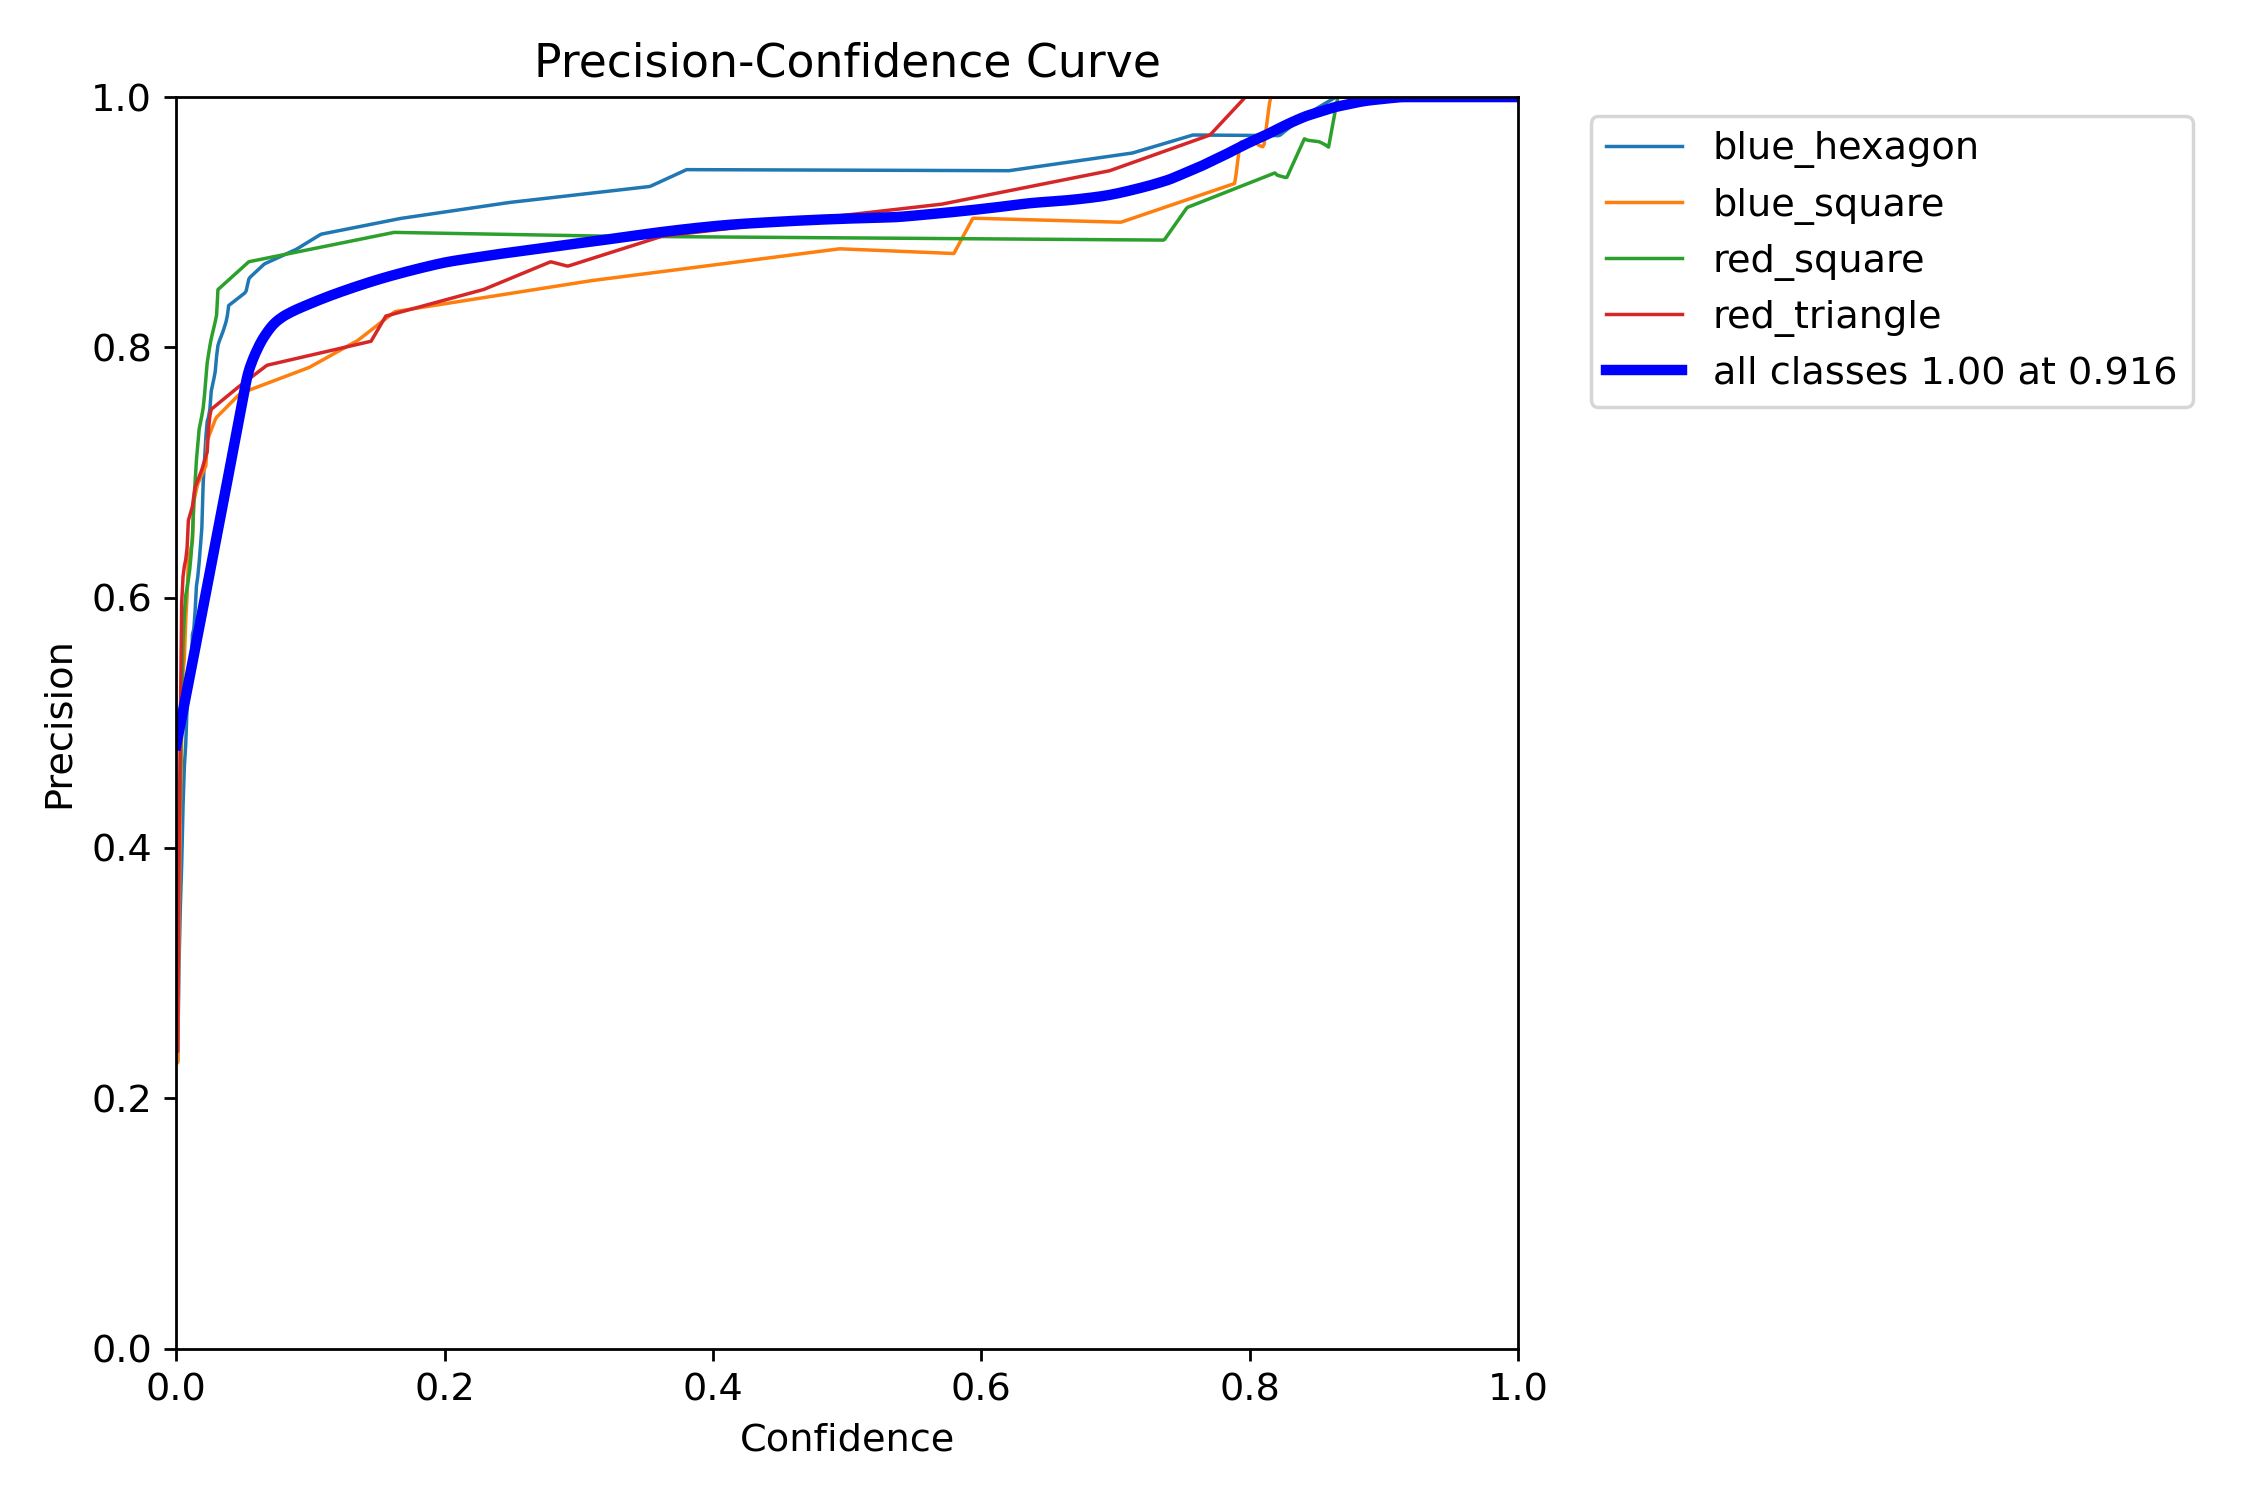

In [15]:
from IPython.display import Image
%cd  /content/drive/MyDrive/proje/YODAML/runs/train2/
Image(filename='BoxP_curve.png',width=600)

Precision: Tespit edilen nesnelerden kaç tanesinin doğru olduğuyla alakalıdır. Eğri yukarıda bir noktadan sonra sabitleniyorsa bu modelin hassas çalıştığının göstergesidir.

/content/drive/MyDrive/proje/YODAML/runs/train2


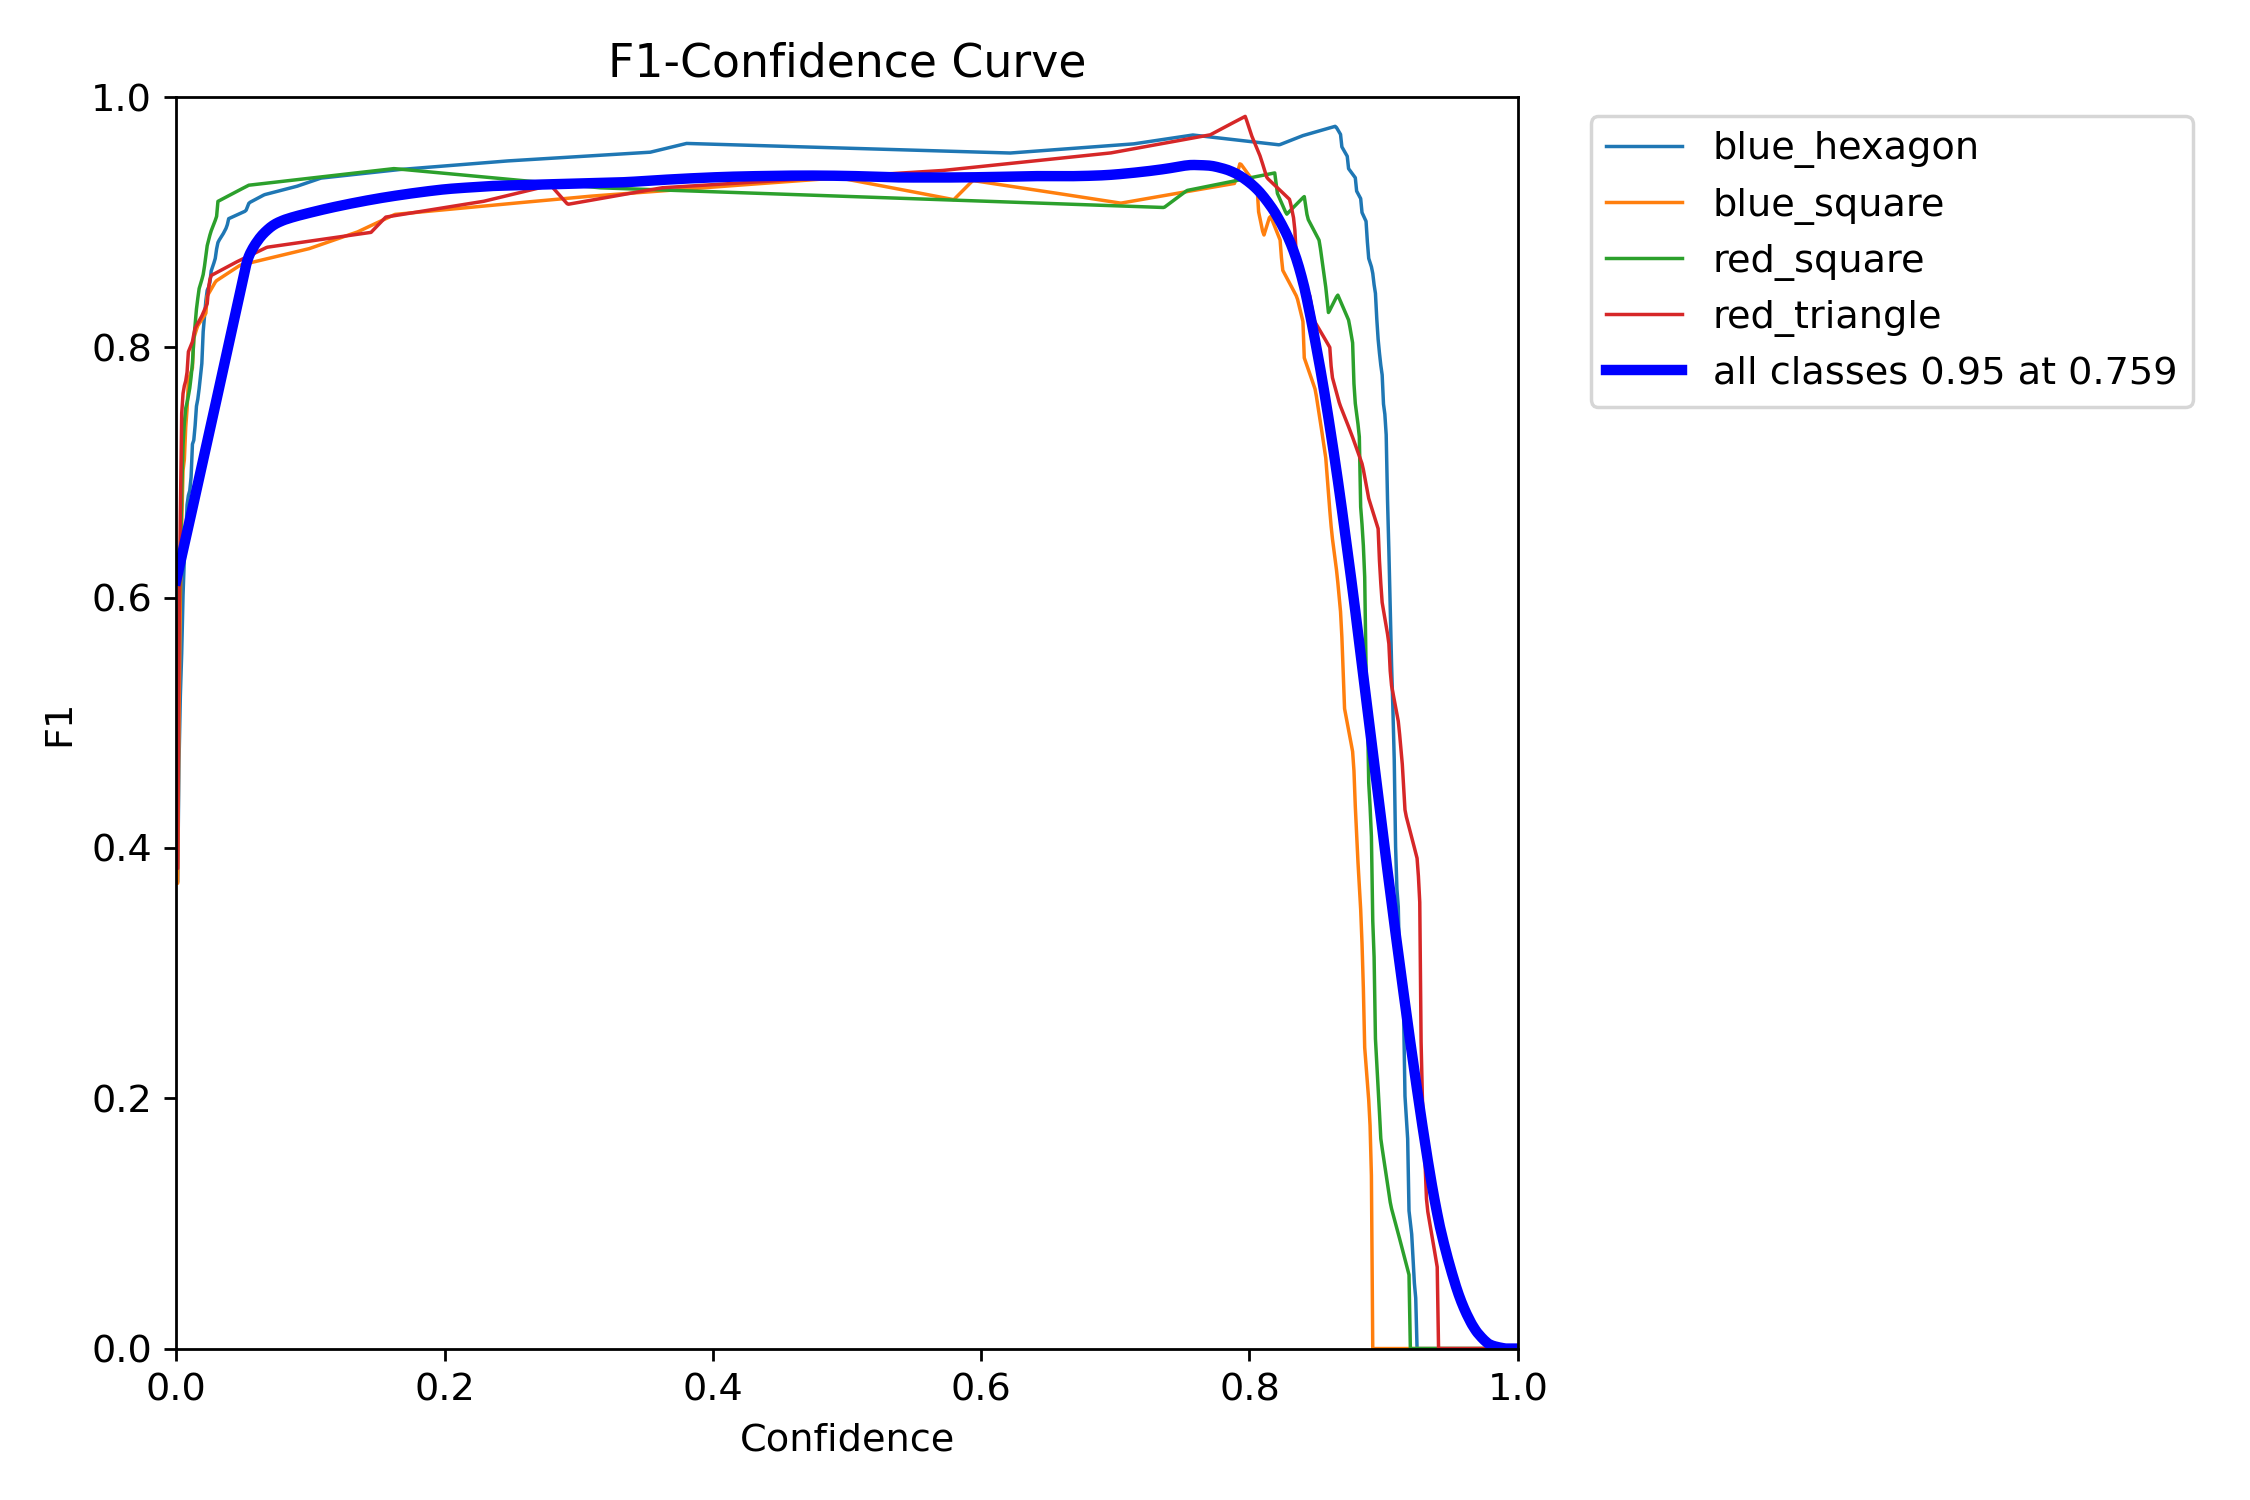

In [16]:
from IPython.display import Image
%cd  /content/drive/MyDrive/proje/YODAML/runs/train2/
Image(filename='BoxF1_curve.png',width=600)

F1: Az önce bahsettiğimiz precision ve recall metriklerinin denge durumuyla alakalıdır. Yani hem doğru tespit yapmaya, hem de doğru tespit edilebilecek görsellerin kaç tanesinin doğru tespit edildiğine önem gösterir.

/content/drive/MyDrive/proje/YODAML/runs/train2


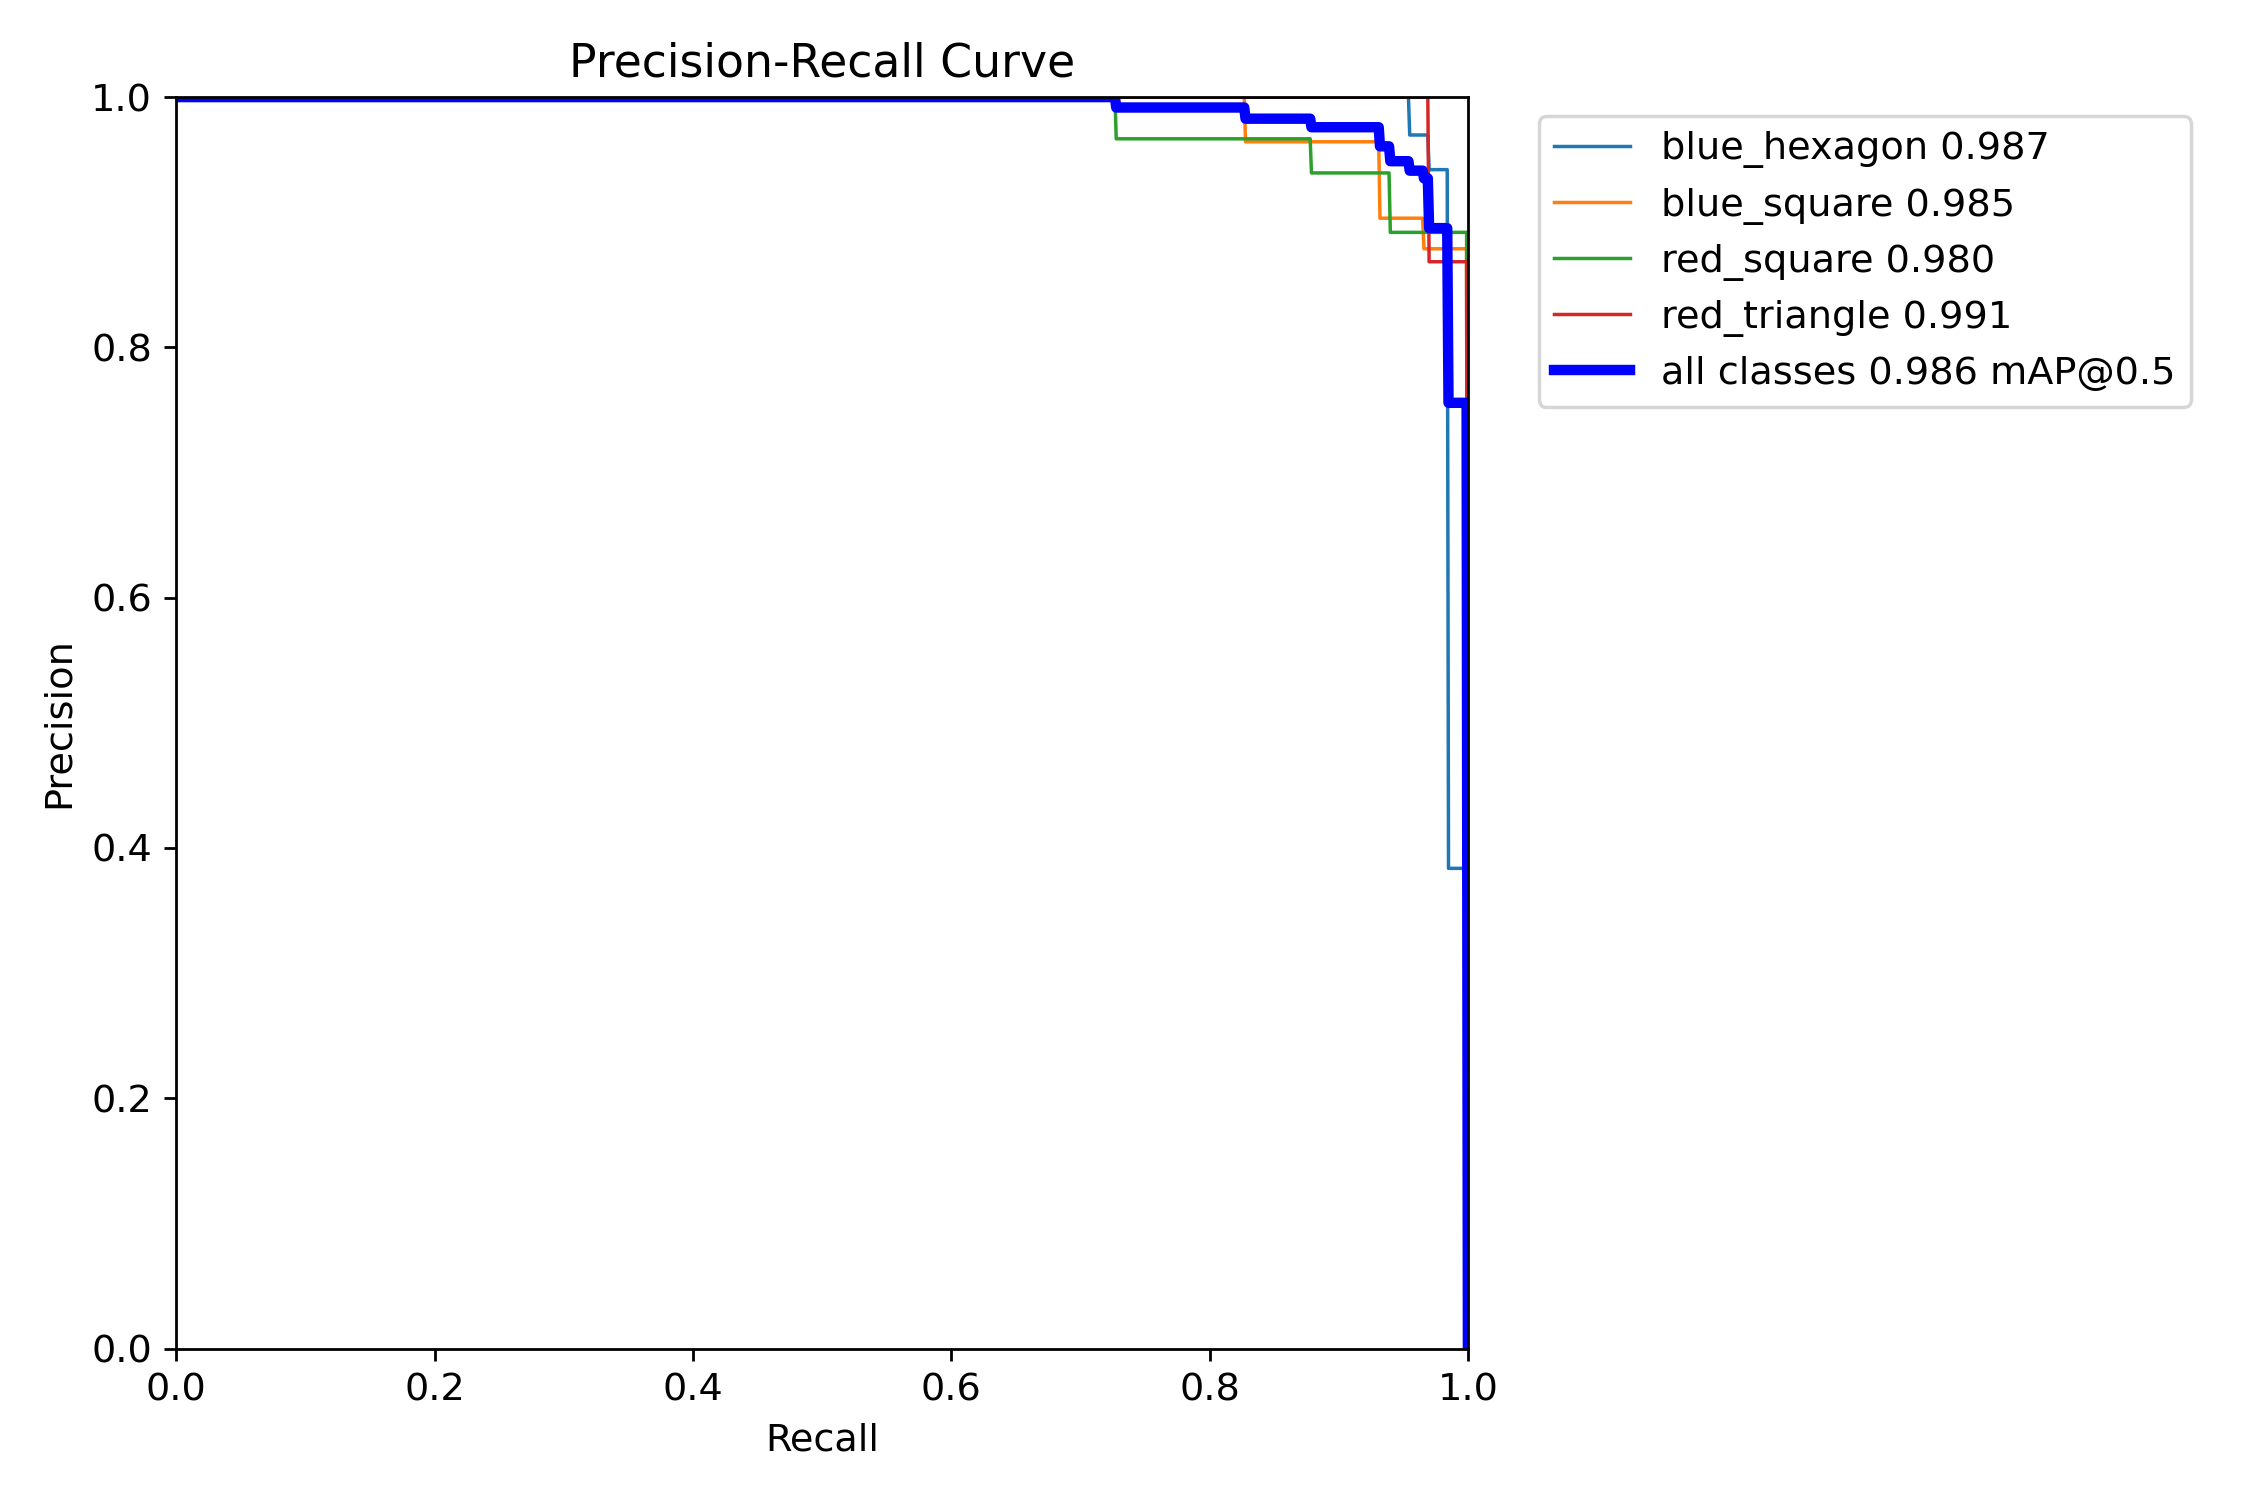

In [17]:
from IPython.display import Image
%cd  /content/drive/MyDrive/proje/YODAML/runs/train2/
Image(filename='BoxPR_curve.png',width=600)

PR: Precision ve Recall arasındaki ilişkiyi farklı eşik değerlerde gösterir. Performans hakkında genel olarak bir bilgi verir. Eğrinin altında kalan ne kadar büyükse model o kadar iyi çalışıyor denebilir.
